In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', size=12) 
plt.style.use('seaborn-poster')

outputdir = "/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/master_plots/17_divergence/"

file_icon = "/home/qwertz/data_js_icon_22_23_August_2018/stat_IQQ_all-times.nc"
ds_icon = xr.open_dataset(file_icon)


print(ds_icon.data_vars)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Data variables:
    clon_bnds      (ncells, vertices) float32 12B ...
    clat_bnds      (ncells, vertices) float32 12B ...
    height_bnds    (height, bnds) float64 3kB ...
    height_3_bnds  (height_3, bnds) float64 3kB ...
    qv             (time, height, ncells) float32 250kB ...
    qc             (time, height, ncells) float32 250kB ...
    qi             (time, height, ncells) float32 250kB ...
    qr             (time, height, ncells) float32 250kB ...
    qs             (time, height, ncells) float32 250kB ...
    qg             (time, height, ncells) float32 250kB ...
    qh             (time, height, ncells) float32 250kB ...
    qnc            (time, height, ncells) float32 250kB ...
    qni            (time, height, ncells) float32 250kB ...
    qnr            (time, height, ncells) float32 250kB ...
    qns            (time, height, ncells) float32 250kB ...
    qng            (time, height, ncells) float32 250kB ...
    qnh            (time, height, ncells) float32 250k

Mittlere Divergenz in ICON data:  -3.0712705e-05


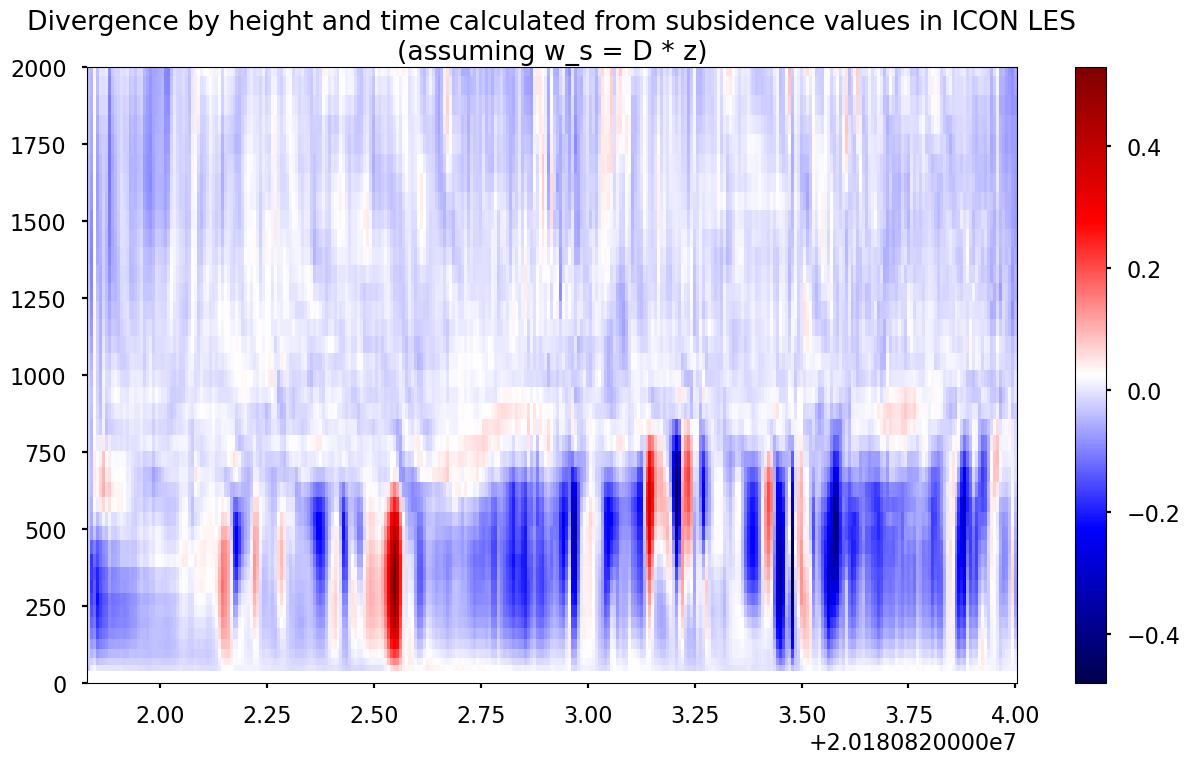

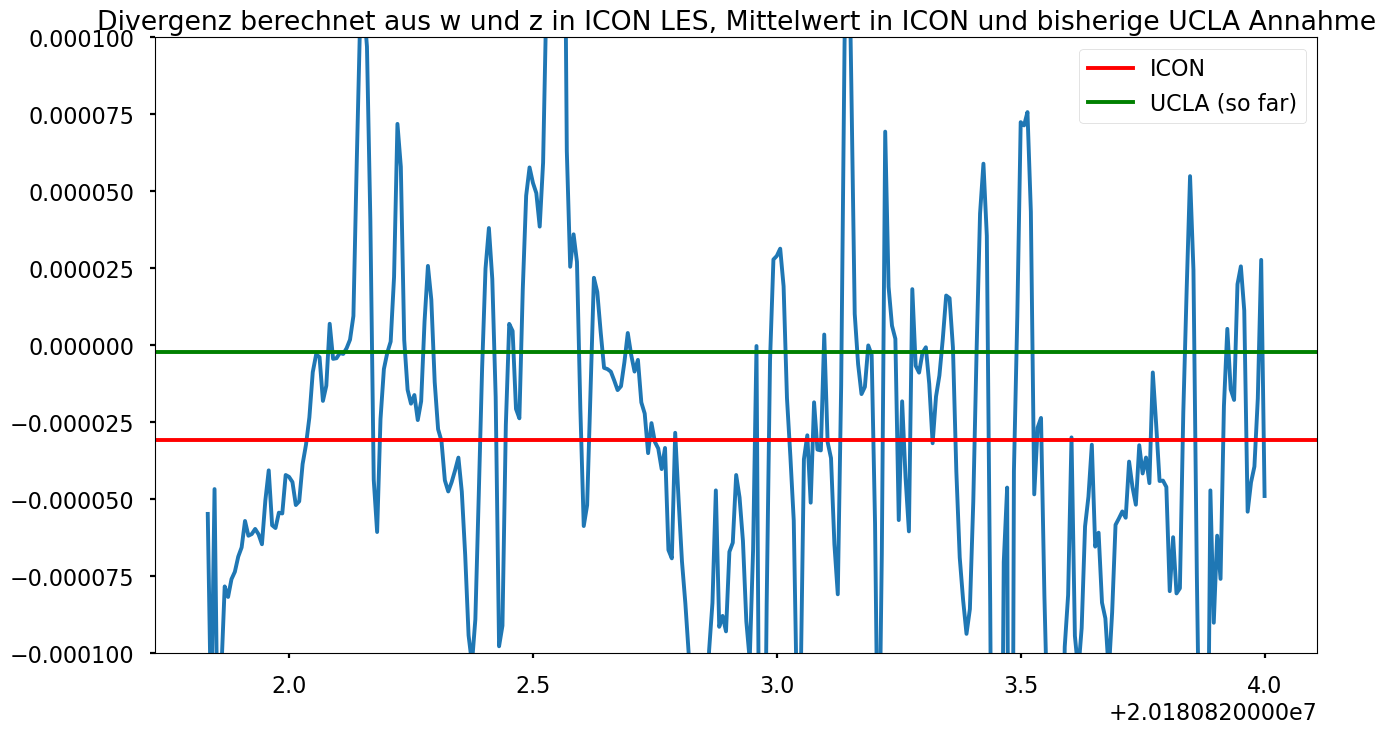

In [2]:
# Get vertical wind array by time - nur für unterste 2700 m kalkuliert:
# w              (time, height_2, ncells) float32 252kB ...

import matplotlib.colors as mcolors
norm = mcolors.TwoSlopeNorm(vmin=-0.0001, vcenter=0, vmax=0.0001)

mean_ws = ds_icon["w"].isel(ncells=0).mean("time")
ws_by_time = ds_icon["w"].isel(ncells=0).values[:,150:]

# Colorplot:
plt.figure(figsize=(15,8))
plt.title("Divergence by height and time calculated from subsidence values in ICON LES\n\
(assuming w_s = D * z)")
plt.pcolormesh(ds_icon["time"], ds_icon["z_ifc"].values[151:], ws_by_time[:,:-1].T, cmap="seismic")
plt.colorbar(norm=norm)
plt.ylim(0,2000)
plt.savefig(outputdir+"divergence_ICON_LES_by_subsidence.png")

# Mean divergence:
ws_for_div = mean_ws.values[150:]
z_for_div = ds_icon["z_ifc"].isel(ncells=0).values[150:]
mean_div_by_height = ws_for_div/z_for_div
mean_div_ICON = np.nanmean(mean_div_by_height)
print("Mittlere Divergenz in ICON data: ", mean_div_ICON)

# Divergence by time:
divergenz_by_height_and_time = ws_by_time/z_for_div
div_by_time = np.nanmean(divergenz_by_height_and_time, axis=1)
plt.figure(figsize=(15,8))
plt.title("Divergenz berechnet aus w und z in ICON LES, Mittelwert in ICON und bisherige UCLA Annahme")
plt.plot(ds_icon["time"], div_by_time)
plt.ylim(-0.0001, 0.0001)
plt.axhline(mean_div_ICON, color="red", label="ICON")
plt.axhline(-2.266e-6, color="green", label="UCLA (so far)")
plt.legend()


###########################################
# Mache den 2. Plot schön und vorzeigbar mit ordentlicher Zeitachse.
# Gibt es sowas wie einen Tagesgang in der Divergenz?

In [3]:
# Measurement divergence
# Observation wind vector from wind lidar:

import subprocess

#########################################################

def convert_julian_to_datetime(julian_array):
    # Konvertiere den Julian-Tag in Unix-Zeitstempel
    unix_times = (julian_array - 2440587.5) * 86400
    
    # Konvertiere Unix-Zeitstempel in Datumszeichenfolgen im ISO-Format
    date_strings = []
    for unix_time in unix_times:
        command = f"date -ud '@{int(unix_time)}' +'%Y-%m-%d %H:%M:%S'"
        result = subprocess.run(command, shell=True, capture_output=True, text=True)
        if result.returncode == 0:
            date_strings.append(result.stdout.strip())
        else:
            raise ValueError("Fehler beim Konvertieren des Unix-Zeitstempels.")
    
    # Konvertiere Datumszeichenfolgen in np.datetime64-Objekte
    datetime_array = np.array(date_strings, dtype='datetime64')
    
    return datetime_array

##############################################################

file_wind22 = "/home/qwertz/obs_data_MA/iqq_lidar_halo/22/wind_vad-24_20180822.nc"
file_wind23 = "/home/qwertz/obs_data_MA/iqq_lidar_halo/23/wind_vad-24_20180823.nc"
ds_wind = xr.open_mfdataset([file_wind22, file_wind23])# # t Kelvin / less timesteps...
# ds_foghat_reduced4 = ds_theta_v4.sel(time=slice(datetime_begin, datetime_end)).mean("time")
datetime_array = convert_julian_to_datetime(ds_wind["time"].values)
ds_wind = ds_wind.assign_coords(time=("time", datetime_array))


/tmp/ipykernel_55913/2033201193.py:34: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds_wind = ds_wind.assign_coords(time=("time", datetime_array))


[  15.   45.   75.  105.  135.  165.  195.  225.  255.  285.  315.  345.
  375.  405.  435.  465.  495.  525.  555.  585.  615.  645.  675.  705.
  735.  765.  795.  825.  855.  885.  915.  945.  975. 1005. 1035. 1065.
 1095. 1125. 1155. 1185. 1215. 1245. 1275. 1305. 1335. 1365. 1395. 1425.
 1455. 1485. 1515. 1545. 1575. 1605. 1635. 1665. 1695. 1725. 1755. 1785.
 1815. 1845. 1875. 1905. 1935. 1965. 1995. 2025. 2055. 2085. 2115. 2145.
 2175. 2205. 2235. 2265. 2295. 2325. 2355. 2385.]
Mittlere Divergenz in Lidar Wind data:  -0.00019285016


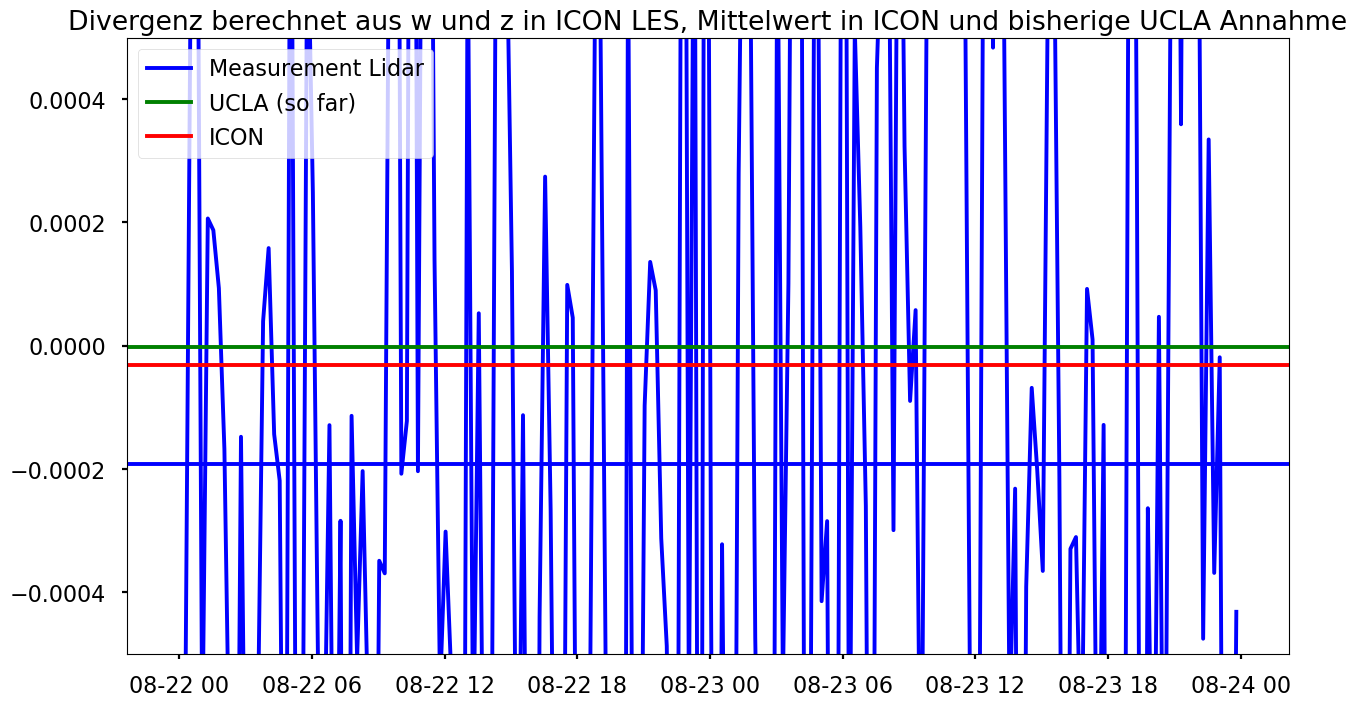

In [4]:
# Calculate divergence for Lidar wind:

zs = ds_wind["height"]
time = ds_wind["time"]
ws_mean = ds_wind["wind_vec"].mean("time").values[2,:]
ws_by_time = ds_wind["wind_vec"].values[2,:,:]

print(zs.values[:80])

# Mean divergence:
ws_for_div = ws_mean[:80]
z_for_div = zs.values[:80]
mean_div_by_height = ws_for_div/z_for_div
mean_div = np.nanmean(mean_div_by_height)
print("Mittlere Divergenz in Lidar Wind data: ", mean_div)


# Divergence by time:
divergenz_by_height_and_time = ws_by_time[:80,:].T / z_for_div
div_by_time_meas = np.nanmean(divergenz_by_height_and_time, axis=1)
plt.figure(figsize=(15,8))
plt.title("Divergenz berechnet aus w und z in ICON LES, Mittelwert in ICON und bisherige UCLA Annahme")
plt.plot(ds_wind["time"], div_by_time_meas, color="blue", linestyle="-")
# plt.plot(ds_icon["time"], div_by_time, color="red", linestyle="-")
plt.ylim(-0.0005, 0.0005)
plt.axhline(mean_div, color="blue", label="Measurement Lidar")
plt.axhline(-2.266e-6, color="green", label="UCLA (so far)")
plt.axhline(mean_div_ICON, color="red", label="ICON")
plt.legend()

########################################
# You could convert ICON time to numpy 64, to make this plot visible with all its parts...
# Obs: -1.9285 e-4
# UCLA: -2.266e-6
# ICON: 3.0713e-05

# => Subsidence / Divergence is very strong in observations and has to be much weaker in UCLA to keep up zi
# => In reality Entrainment counteracting Subsidence must be much stronger, than it appears in models!
# Es wäre aber bessser Daten für w von oberhalb von zi einzubeziehen...

<xarray.DataArray 't' (time: 124, level: 16, latitude: 161, longitude: 161)> Size: 206MB
[51427264 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 644B -90.0 -89.75 -89.5 ... -50.25 -50.0
  * latitude   (latitude) float32 644B 0.0 -0.25 -0.5 ... -39.5 -39.75 -40.0
  * level      (level) int32 64B 500 550 600 650 700 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 992B 2018-08-01 ... 2018-08-31T18:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature
Mean divergence at 1000 m:  -4.069406636894517e-05
For other heights: 
Mean divergence at  0   500  m:  1.0725545428862306e-05
Mean divergence at  1   550  m:  6.9696407446681105e-06
Mean divergence at  2   600  m:  4.561577554891958e-06
Mean divergence at  3   650  m:  1.170482365416182e-06
Mean divergence at  4   700  m:  5.648159803940025e-07
Mean divergence at  5   750  m:  4.680550426496736e-06
Mean divergence at  6   775  m:  5.5447615489595

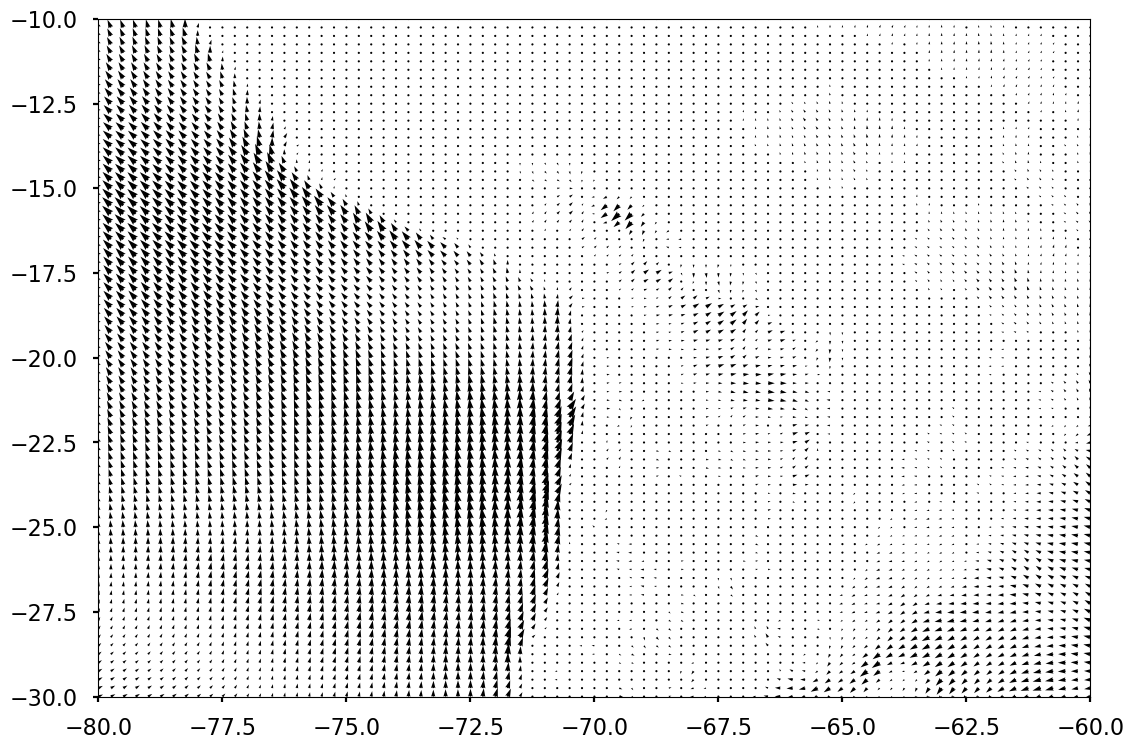

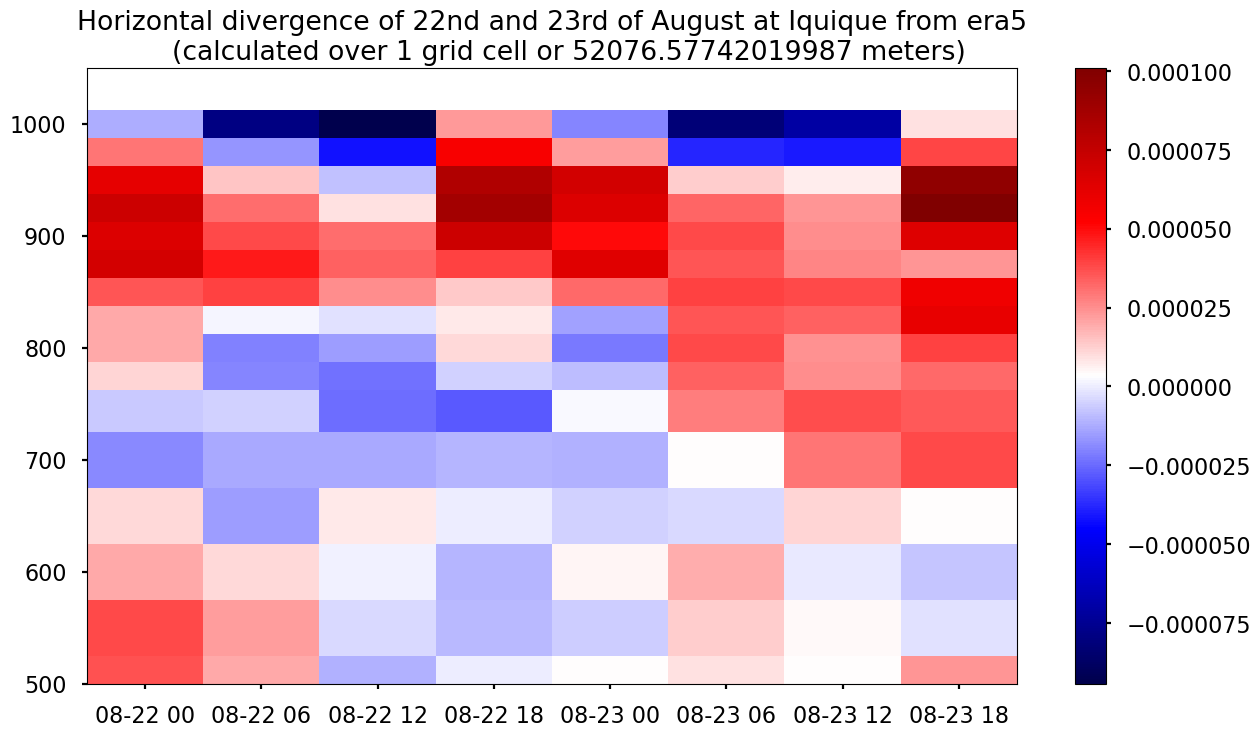

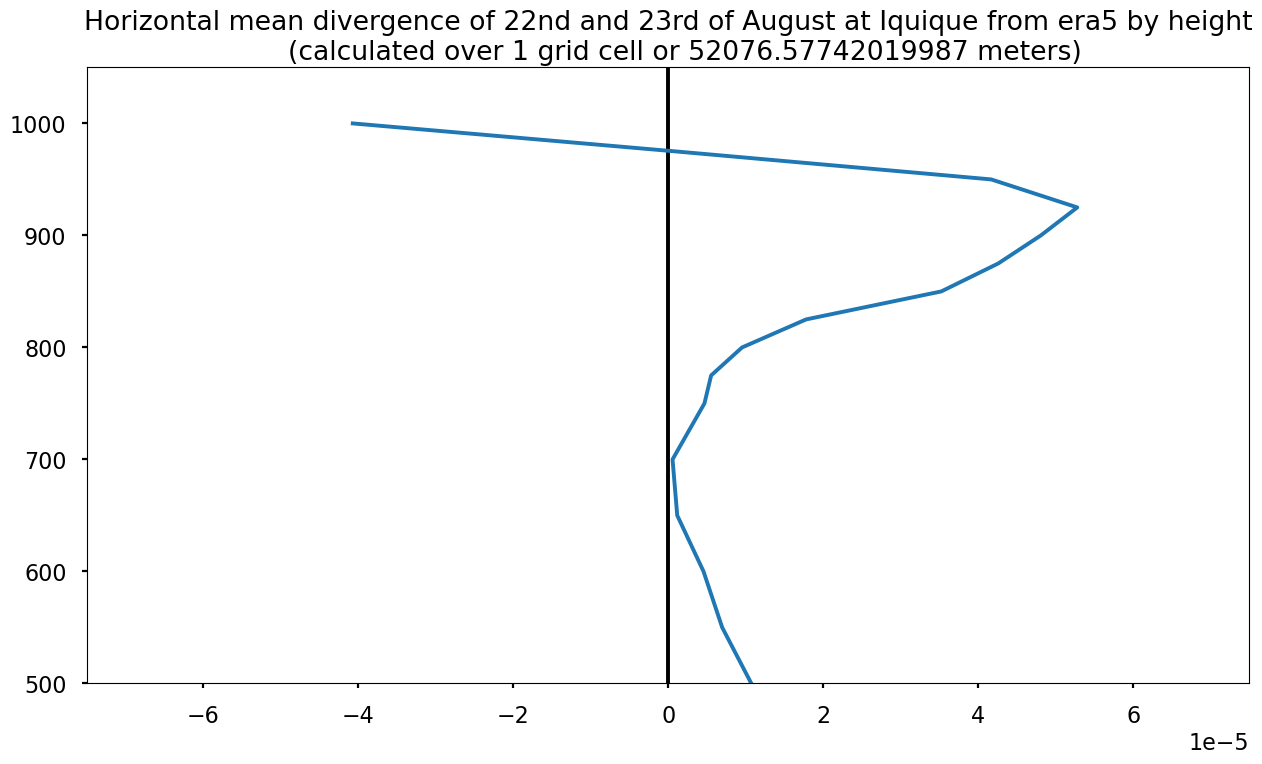

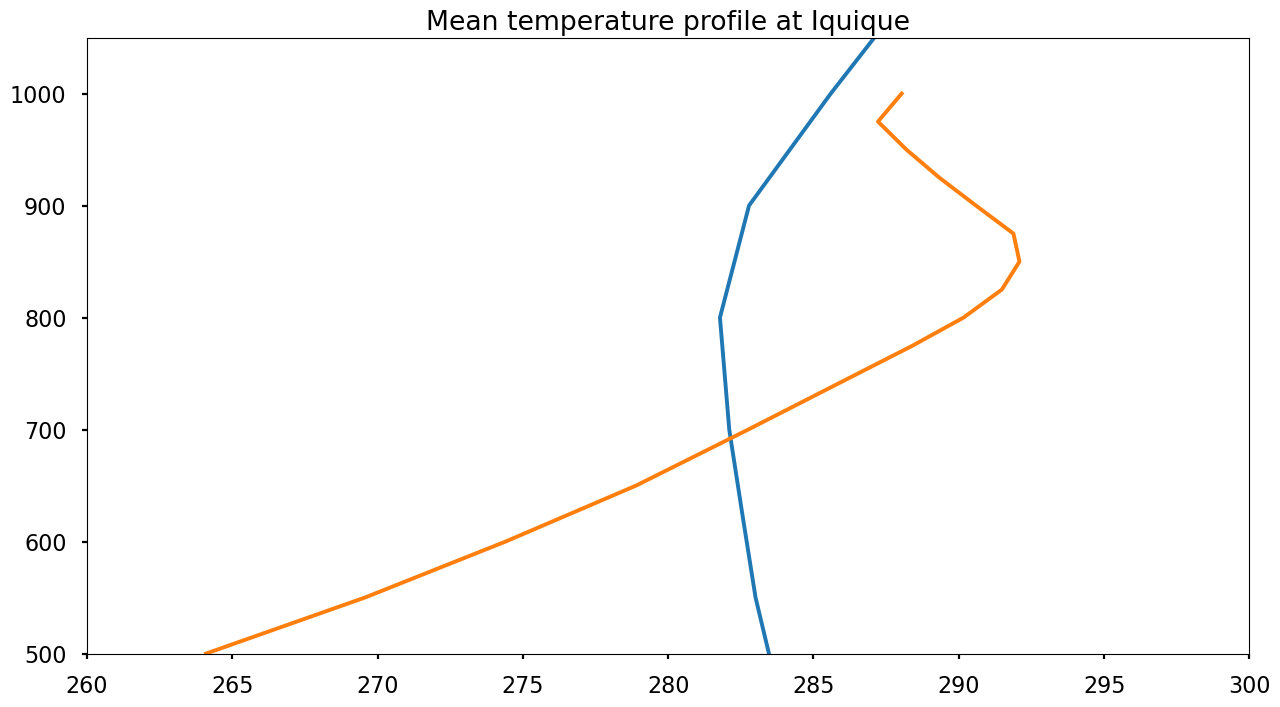

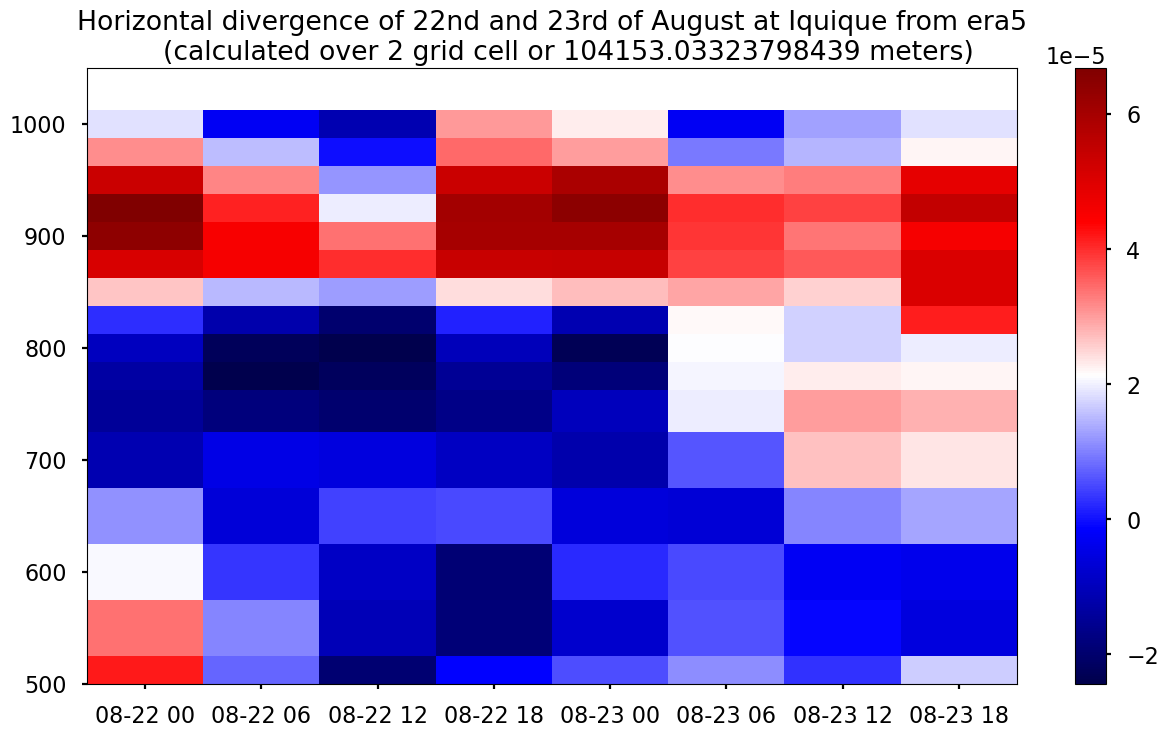

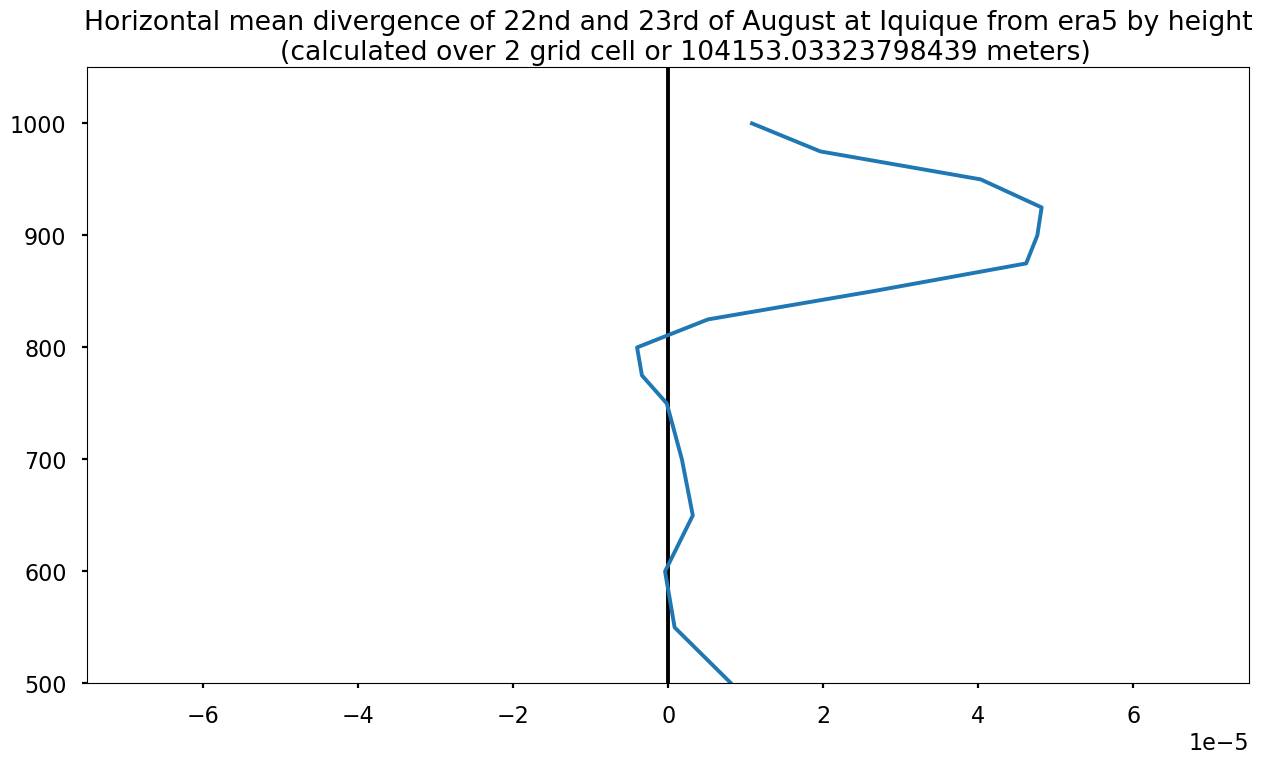

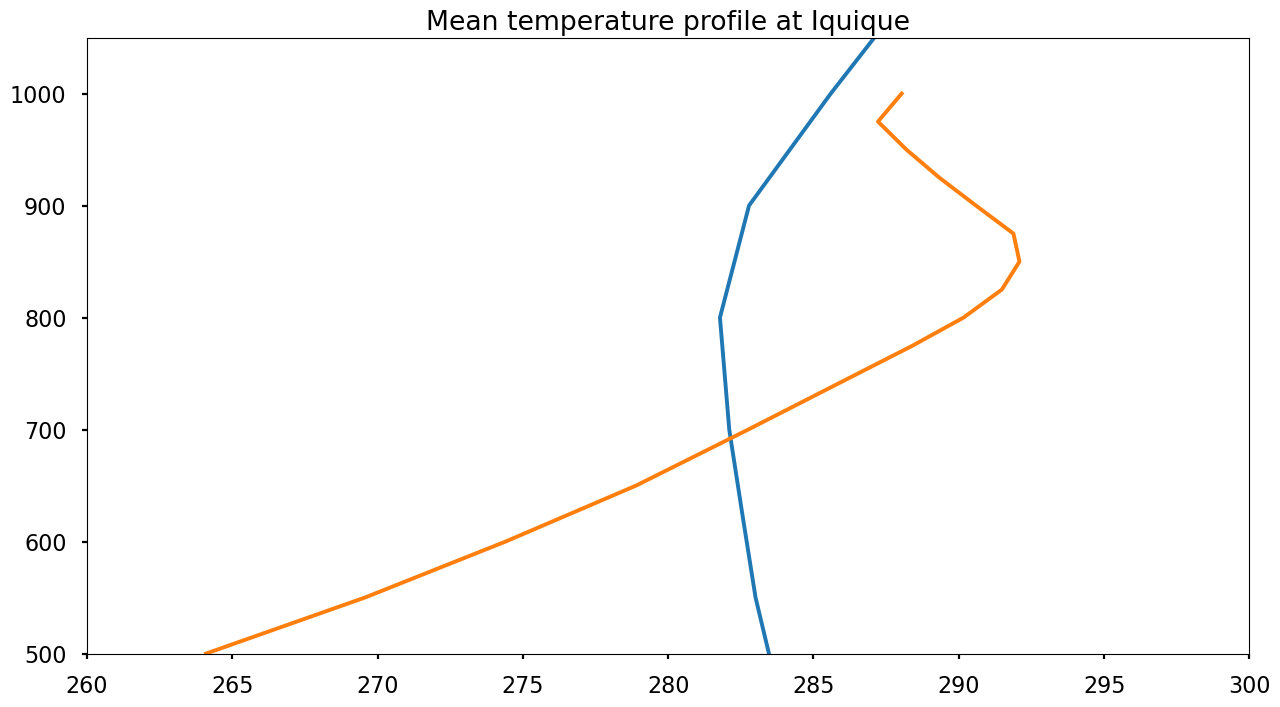

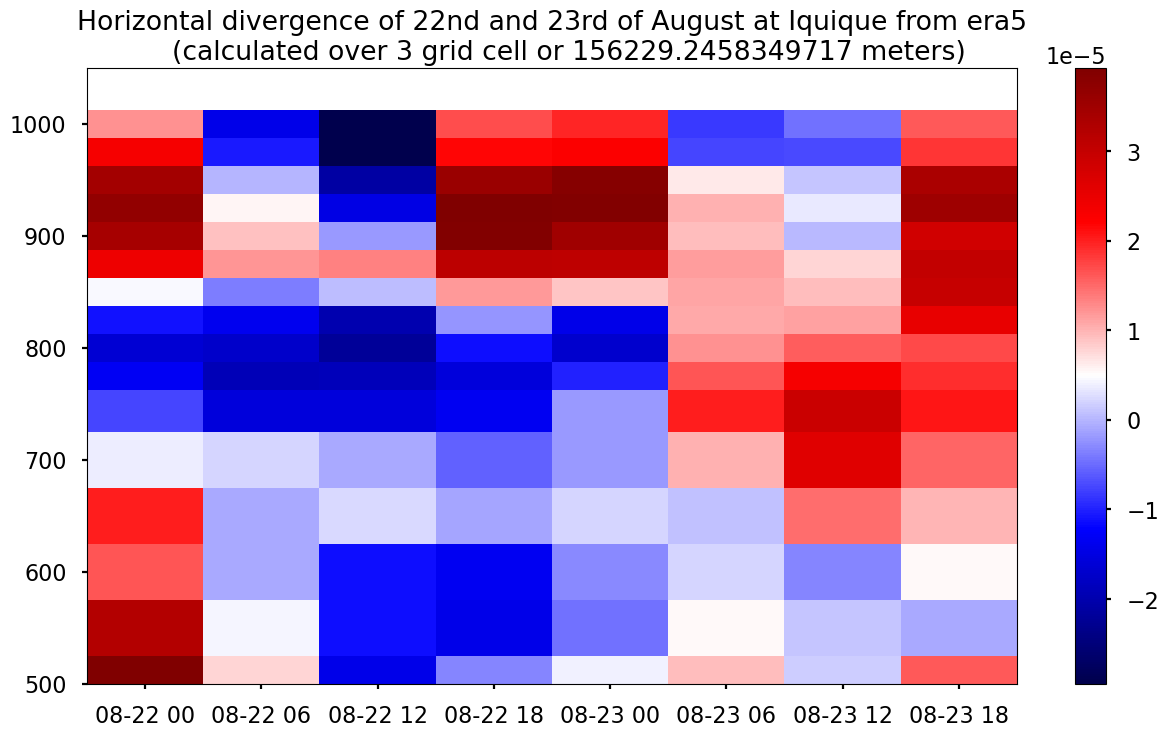

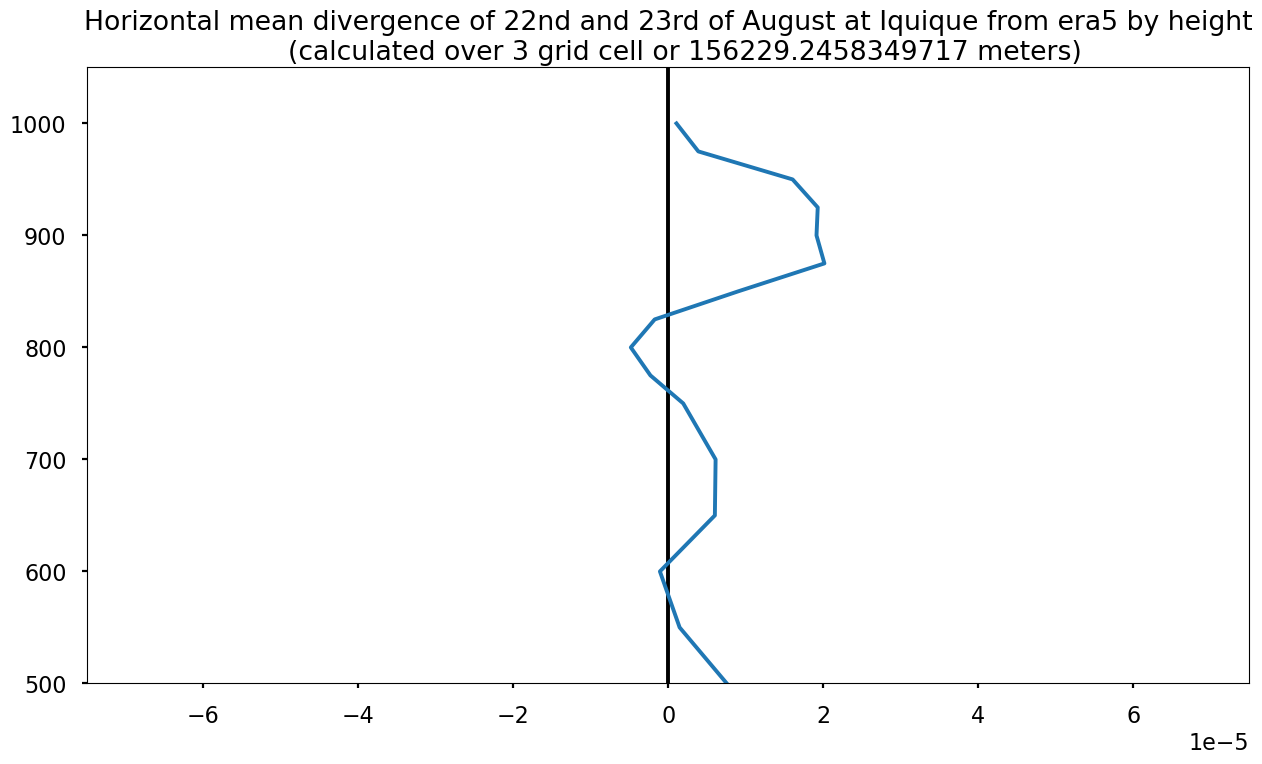

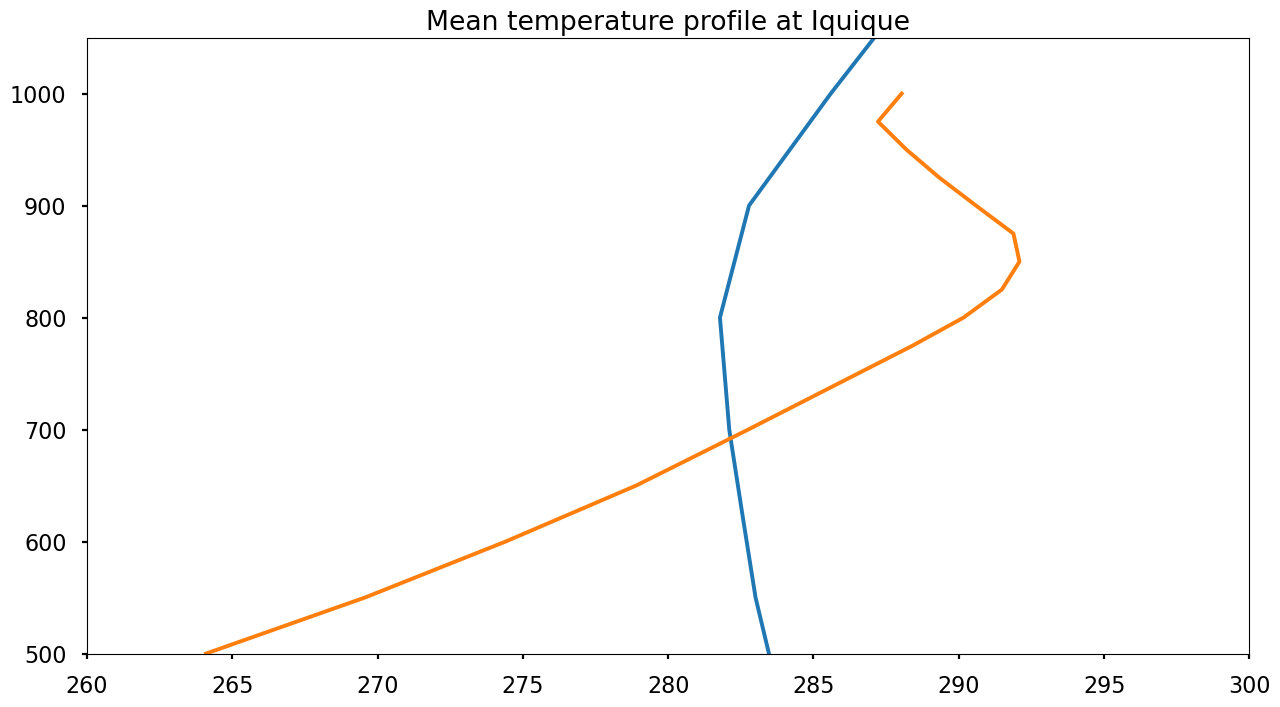

In [19]:
# Berechne die Divergenz als Divergenz des horizontalen Windfeldes in 1000 m höher oder darüber / darunter aus Era5:
# IQQ: -20.539444 ; -70.1772694 (-20.5 ==index 82, -70.25 == index 79)

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.colors as mcolors

norm = mcolors.TwoSlopeNorm(vmin=-0.0001, vcenter=0, vmax=0.0001)


##############################################
# Temperature profile:

file_BLta22 = "/home/qwertz/obs_data_MA/iqq_foghat/22/sups_iqq_mwrBL00_l2_ta_p00_20180822000243.nc"
file_BLta23 = "/home/qwertz/obs_data_MA/iqq_foghat/23/sups_iqq_mwrBL00_l2_ta_p00_20180823000753.nc"
ds_BLta = xr.open_mfdataset([file_BLta22, file_BLta23])# # t Kelvin / less timesteps...

###########################################

def haversine(lon1, lat1, lon2, lat2):
    # Radius der Erde in Metern
    R = 6371000  # in Metern
    
    # Koordinaten in Bogenmaß umwandeln
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    
    # Haversine-Formel
    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Entfernung berechnen
    distance = R * c  # in Metern
    return distance

################################


era5_file = "/home/qwertz/forcing_icon/era5data_August/pl_q_u_v_201808_6hourly.nc"
ds_era5 = xr.open_dataset(era5_file)

print(ds_era5["t"])

ds_reduced = ds_era5.sel(time=slice("2018-08-22", "2018-08-23")).sel(level=1000)

plt.quiver(ds_reduced.isel(time=0)["longitude"],ds_reduced.isel(time=0)["latitude"],\
           ds_reduced.isel(time=0)["u"],  ds_reduced.isel(time=0)["v"], scale=800.)
plt.xlim(-80,-60)
plt.ylim(-30,-10)

ds_iqq_by_level_and_time = np.zeros([len(ds_era5.sel(time=slice("2018-08-22", "2018-08-23"))["time"]),len(ds_era5["level"])])

increment = 3
y_distances= []
x_distances= []

for increment in [1,2,3]:

    for i, level in enumerate(ds_era5["level"]):
        # print(i, level)
        # 1000 m = 15
        ds = ds_era5.sel(time=slice("2018-08-22", "2018-08-23")).isel(level=i)
        
        for j, timestep in enumerate(ds["time"].values):
            lonpl = ds["longitude"].values[79+increment]
            lonmi =  ds["longitude"].values[79-increment]
            latpl = ds["latitude"].values[82+increment]
            latmi = ds["latitude"].values[82-increment]
            ds_iqq_by_level_and_time[j,i] = (ds["u"][j, 82, 79+increment] - ds["u"][j, 82, 79-increment]) /\
            (haversine(lonpl, -20.5 , lonmi, -20.5 )) +\
                (ds["v"][j, 82+increment, 79] - ds["v"][j, 82-increment, 79]) /\
            (haversine(-70.25, latpl , -70.25, latmi))
    x_distances.append(haversine(lonpl, -20.5 , lonmi, -20.5 ))
    y_distances.append(haversine(-70.25, latpl , -70.25, latmi))

        
    plt.figure(figsize=(15,8))
    plt.title("Horizontal divergence of 22nd and 23rd of August at Iquique from era5\n\
    (calculated over "+str(increment)+" grid cell or "+str(x_distances[increment-1])+" meters)")
    plt.pcolormesh(ds["time"], ds_era5["level"], ds_iqq_by_level_and_time.T, cmap="seismic")
    plt.colorbar(norm=norm)
    plt.ylim(500,1050)
    # plt.xlim(-0.000075, 0.000075)
    plt.savefig(outputdir+"divergence_era5_by_height_and_time_"+str(increment)+".png")
    
    print("Mean divergence at 1000 m: ", np.mean(ds_iqq_by_level_and_time[:,15]))
    print("For other heights: ")
    div_by_height = []
    for i, level in enumerate(ds_era5["level"]):
        print("Mean divergence at ", i ," ", level.values, " m: ", np.mean(ds_iqq_by_level_and_time[:,i]))
        div_by_height.append( np.mean(ds_iqq_by_level_and_time[:,i]))
        
    plt.figure(figsize=(15,8))
    plt.title("Horizontal mean divergence of 22nd and 23rd of August at Iquique from era5 by height\n\
    (calculated over "+str(increment)+" grid cell or "+str(x_distances[increment-1])+" meters)")
    plt.axvline(0, color="black")
    plt.plot(div_by_height, ds_era5["level"])
    # plt.xlim(-1e-4, 1e-4)
    plt.xlim(-0.000075, 0.000075)
    plt.ylim(500,1050)
    plt.savefig(outputdir+"divergence_era5_mean_by_height_"+str(increment)+".png")

    plt.figure(figsize=(15,8))
    plt.title("Mean temperature profile at Iquique")
    plt.plot(ds_BLta["ta"].mean("time"), ds_BLta["height"], label="Foghat")
    plt.plot(ds_era5["t"].sel(time=slice("2018-08-22", "2018-08-23")).mean("time").values[:,82, 79], ds_era5["level"], label="era5")
    # Level is in milibars...
    plt.ylim(500,1050)
    plt.xlim(260,300)


print("****************")
print(ds_era5["level"])
print("****************")
print(ds_era5["t"].sel(time=slice("2018-08-22", "2018-08-23")).mean("time"))
print("****************")

# - 7.5e-5 bis 1.e-4
#########################
# größere räumliche Ausdehnung;
# vertikale Profile
# Vergleich mit Temperaturprofilen

70 km West:  Lat: -20.539444 Lon: -70.84952951128673
70 km East:  Lat: -20.539444 Lon: -69.50500928871327
70 km North:  Lat: -19.90991887585689 Lon: -70.1772694
70 km South:  Lat: -21.16896912414311 Lon: -70.1772694
Mean divergence at  0   0.0  m:  2.310112847222222e-05
Mean divergence at  1   105.26315789473684  m:  3.385404480828179e-05
Mean divergence at  2   210.52631578947367  m:  4.122952885097928e-05
Mean divergence at  3   315.7894736842105  m:  4.740184677971733e-05
Mean divergence at  4   421.05263157894734  m:  6.170869403415258e-05
Mean divergence at  5   526.3157894736842  m:  6.126286188761393e-05
Mean divergence at  6   631.578947368421  m:  3.489118152194553e-05
Mean divergence at  7   736.8421052631578  m:  2.1348720126681857e-05
Mean divergence at  8   842.1052631578947  m:  3.303233252631294e-05
Mean divergence at  9   947.3684210526316  m:  3.923759460449219e-05
Mean divergence at  10   1052.6315789473683  m:  7.1627320183648e-05
Mean divergence at  11   1157.894736

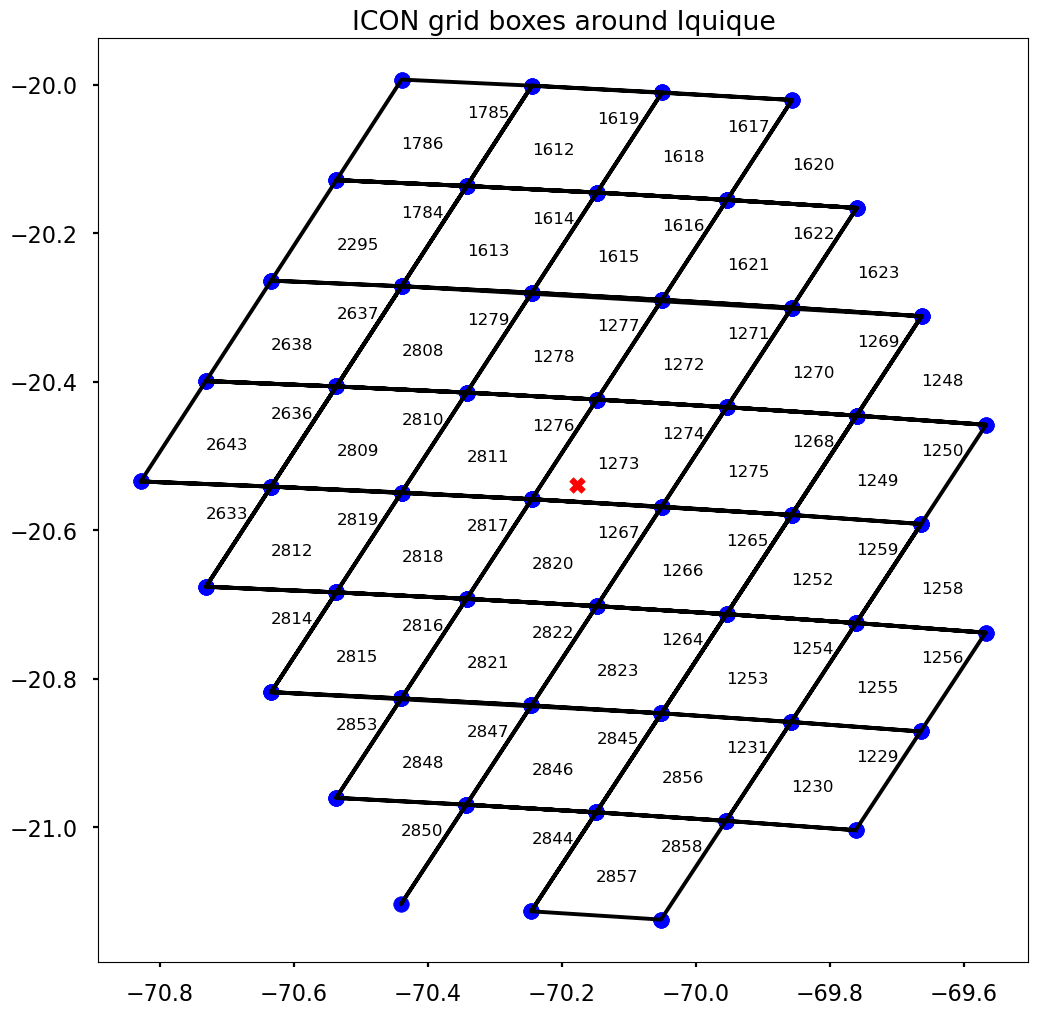

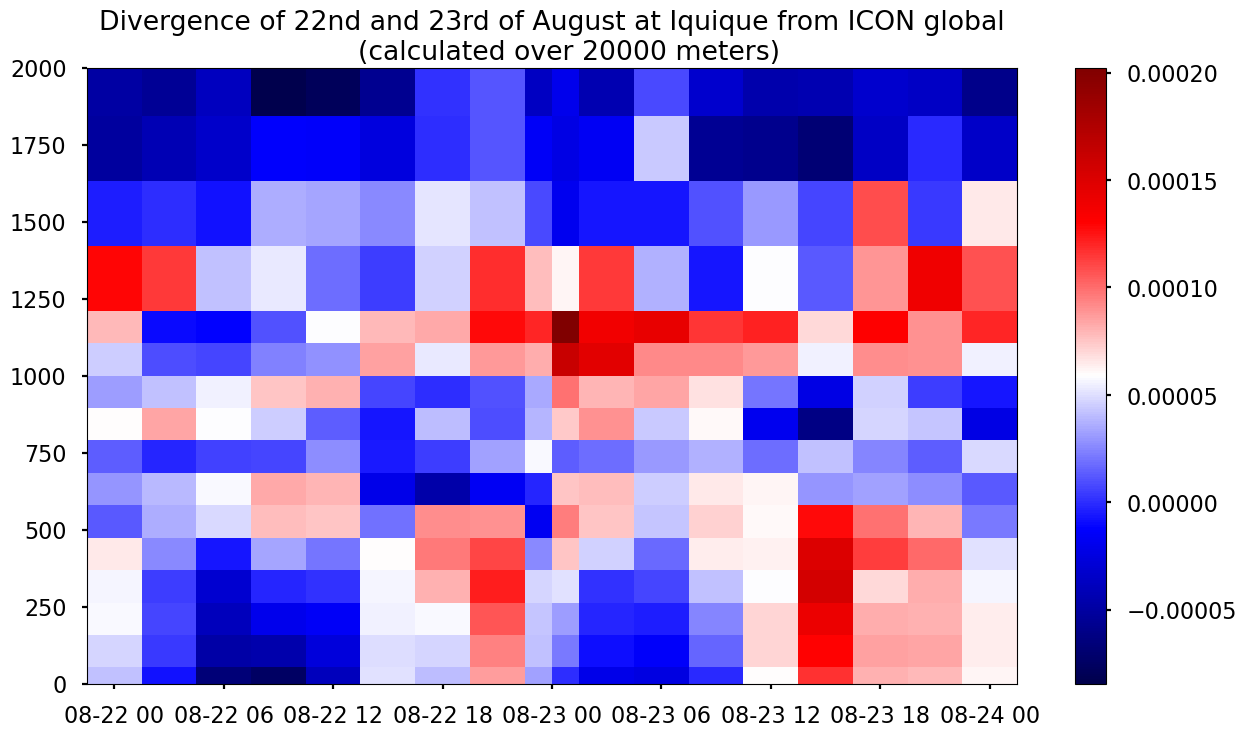

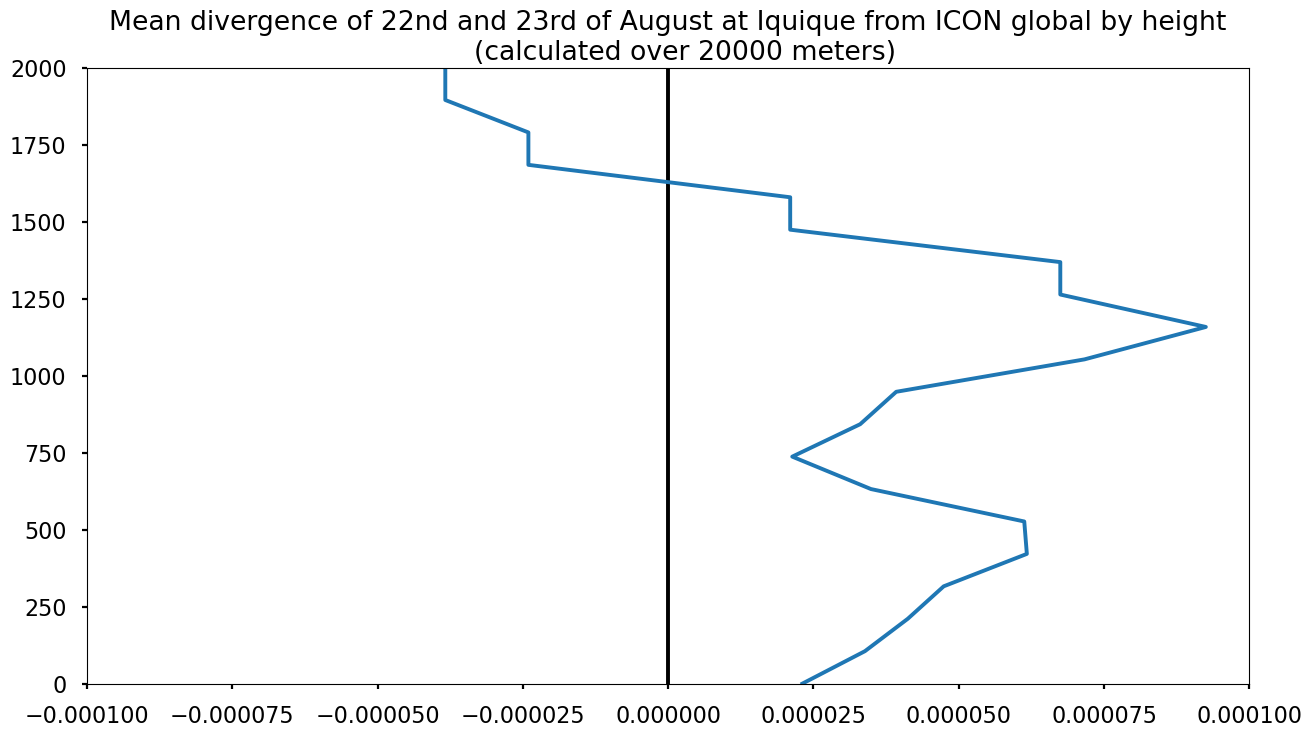

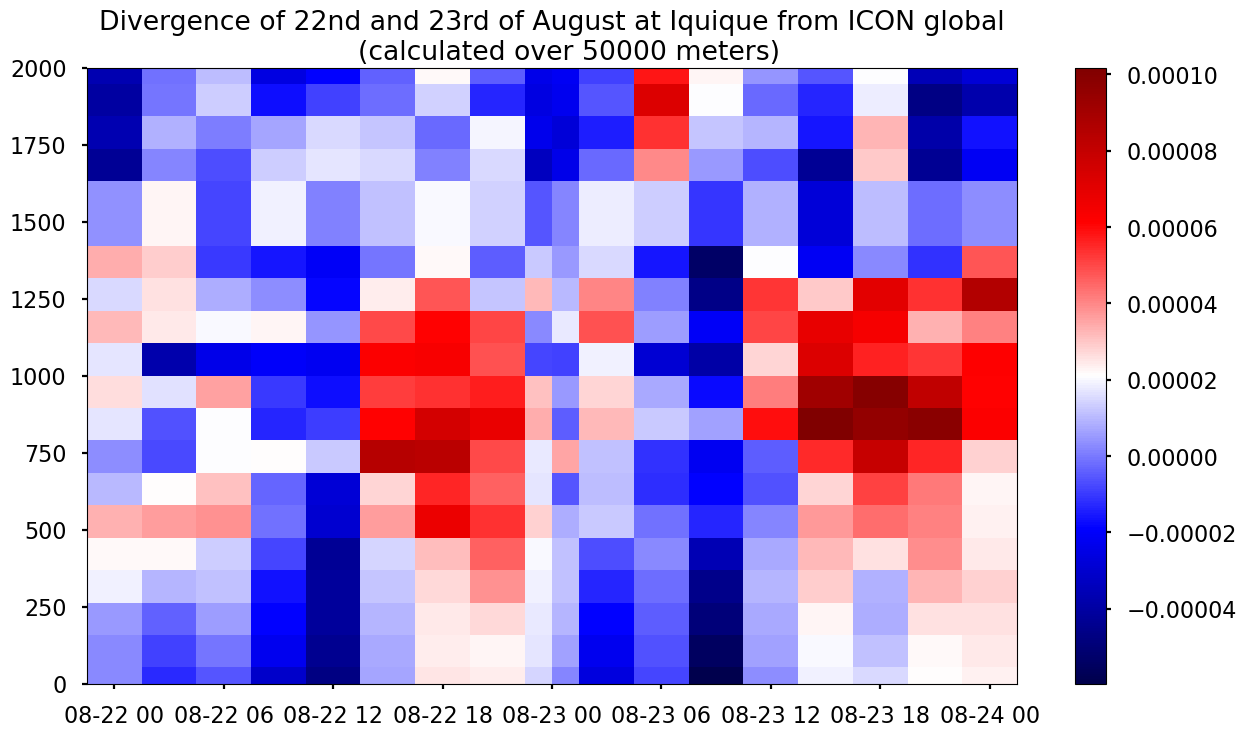

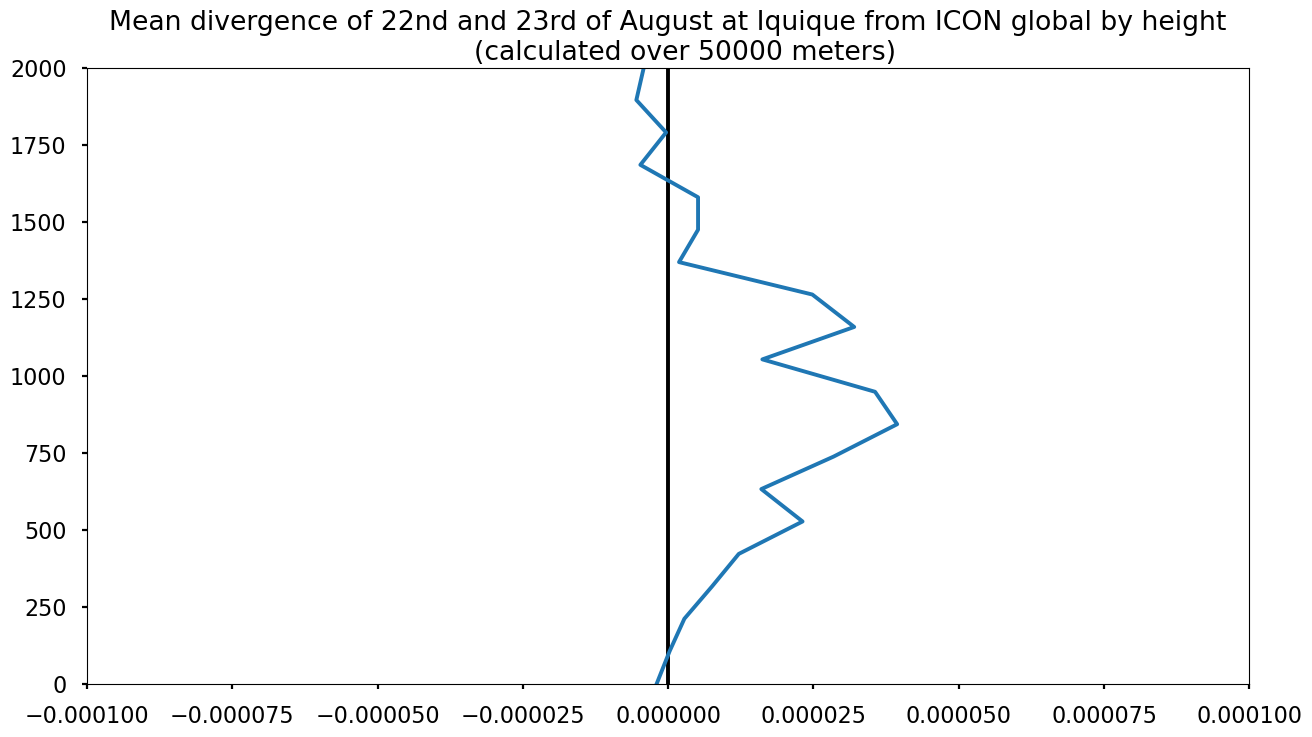

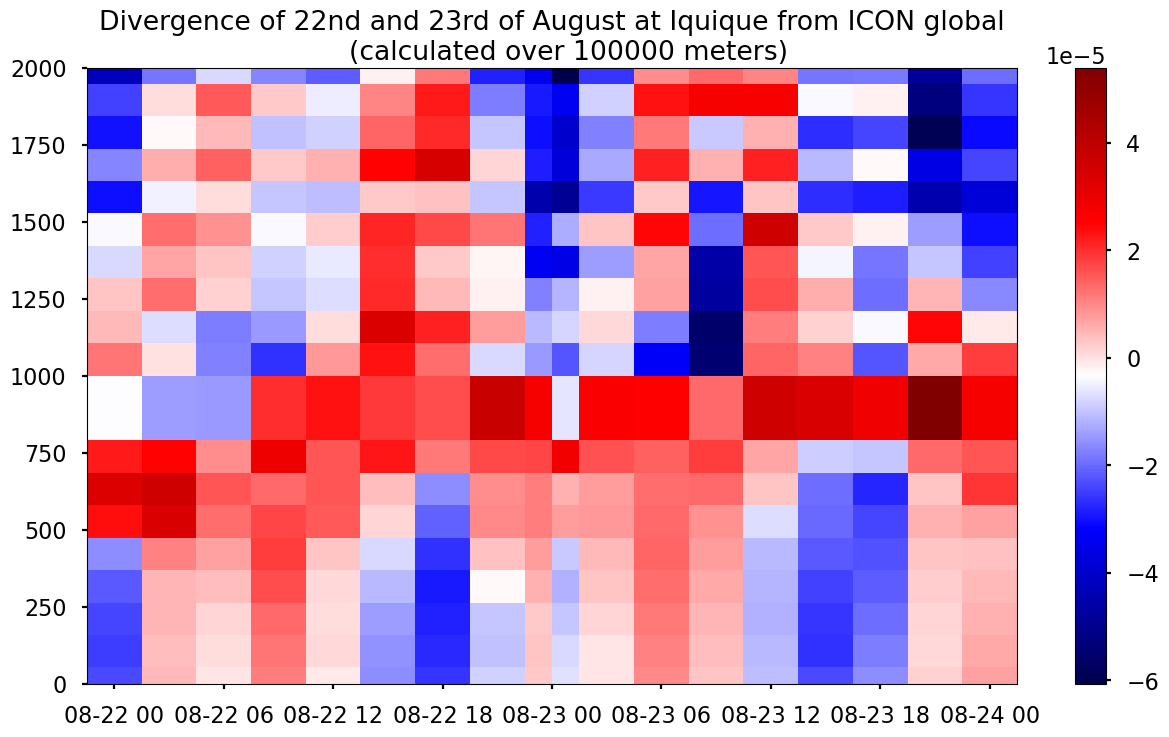

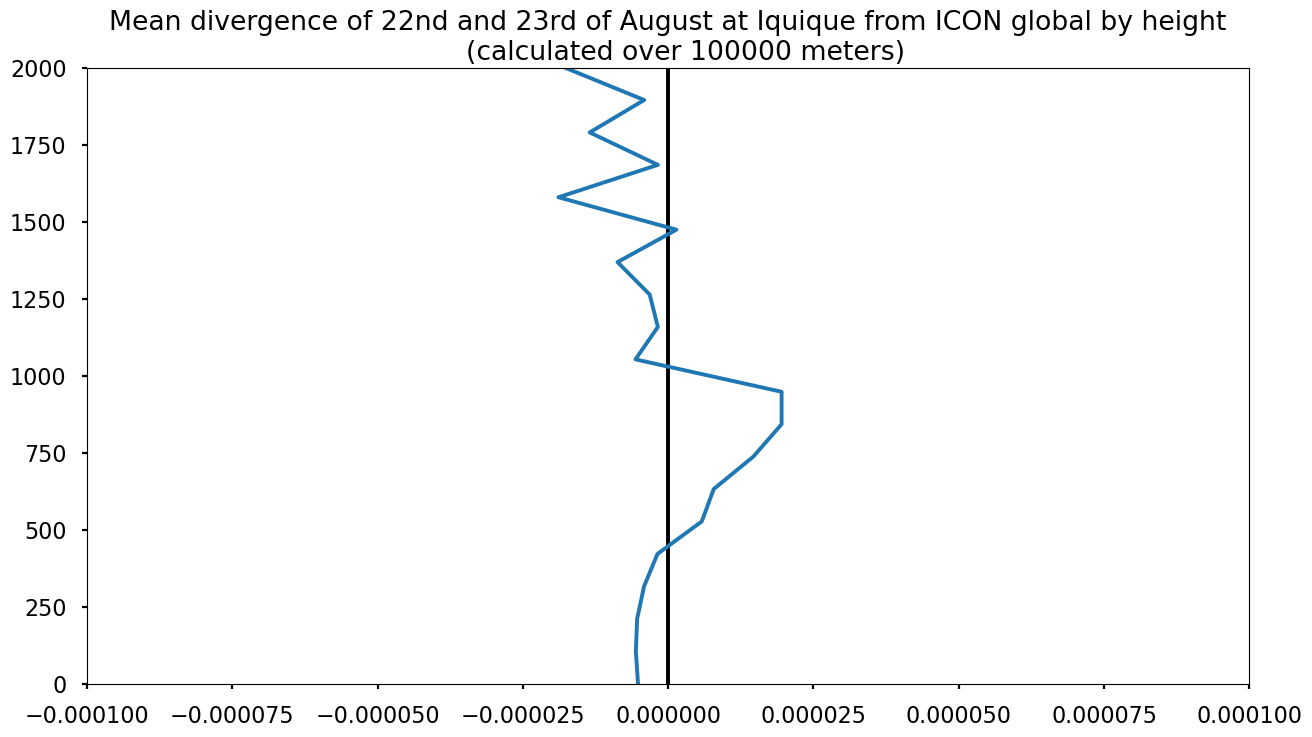

In [6]:
# ICON global:

# HHL 60 == 1062 m
from geopy.distance import geodesic

path_icon = "/home/qwertz/forcing_icon/icon20180822/"
gridfile = "icon_grid_chile_R03B07_20180103.nc"
extpar_file = "icon_extpar_chile_R03B07_20180103.nc"
file = "entpackt/2018/08/2018082200_icon.nc"
file2 = "entpackt/2018/08/2018082300_icon.nc"
datads1 = xr.open_dataset(path_icon+file)
datads2 = xr.open_dataset(path_icon+file2)
datads = xr.concat([datads1, datads2], dim="time")

############################################

path = "/home/qwertz/forcing_icon/icon20180822/"
list_of_files = ["icon_extpar_chile_R03B07_20180103.nc", "icon_grid_chile_R03B07_20180103.nc"]

ds1 = xr.open_dataset(path+list_of_files[0])
ds2 = xr.open_dataset(path+list_of_files[1])
gridds = xr.open_dataset(path_icon+gridfile)

##############################################
# Find grid cell of IQQ:

radius_around_iqq=60

ref_distance = 350
iqq_index = 0
close = []
for i, (clatval, clonval) in enumerate(zip(gridds["clat"].values, gridds["clon"].values)):
    lat2 = np.rad2deg(clatval)
    lon2 = np.rad2deg(clonval)
    lat1_ref= -20.539444
    lon1_ref= -70.1772694
    reference_point = (lat1_ref, lon1_ref)
    target_point = (lat2, lon2)
    distance = geodesic(reference_point, target_point).kilometers
    if distance < ref_distance:
        ref_distance = distance
        iqq_index = i
    if distance<radius_around_iqq: # original 25
        close.append(i)

##############################################
# Find neighbour grid cells:
lons = []
lats = []
plt.figure(figsize=(12,12))
for index in close:
    #print(index, " vlat: ", gridds["clat_vertices"].values[index])
    #print(index, " vlon: ", gridds["clon_vertices"].values[index])
    mean_lon = np.rad2deg(np.mean(gridds["clon_vertices"].values[index]))
    mean_lat = np.rad2deg(np.mean(gridds["clat_vertices"].values[index]))
    plt.text(mean_lon, mean_lat, str(index))
    for (lat, lon) in zip(gridds["clat_vertices"].values[index], gridds["clon_vertices"].values[index]):
        lons.append(np.rad2deg(lon))
        lats.append(np.rad2deg(lat))

plt.title("ICON grid boxes around Iquique")
plt.scatter(lons, lats, color="blue")
plt.scatter(-70.1772694, -20.539444, color="red", marker="X")
plt.plot(lons, lats, color="black")
plt.savefig(outputdir+"ICON_LES_cells_around_IQQ_radius_"+str(radius_around_iqq)+".png")
# plt.plot(lons[::2], lats[::2], color="black")

##############################################

def move_coordinate(direction, lat, lon, dist_km):
    # Erdradius in km
    R = 6371.0

    # Distanz in Radiant umwandeln
    dist_rad = dist_km / R

    # Konvertiere lat und lon von Grad zu Radiant
    lat_rad = math.radians(lat)
    lon_rad = math.radians(lon)

    # Neue Koordinaten berechnen basierend auf der Richtung
    if direction.lower() == "nördlich":
        new_lat_rad = lat_rad + dist_rad
        new_lon_rad = lon_rad
    elif direction.lower() == "südlich":
        new_lat_rad = lat_rad - dist_rad
        new_lon_rad = lon_rad
    elif direction.lower() == "östlich":
        new_lat_rad = lat_rad
        new_lon_rad = lon_rad + dist_rad / math.cos(lat_rad)
    elif direction.lower() == "westlich":
        new_lat_rad = lat_rad
        new_lon_rad = lon_rad - dist_rad / math.cos(lat_rad)
    else:
        raise ValueError("Die Richtung muss 'nördlich', 'südlich', 'östlich' oder 'westlich' sein")

    # Konvertiere die neuen lat/lon Werte zurück zu Grad
    new_lat = math.degrees(new_lat_rad)
    new_lon = math.degrees(new_lon_rad)

    # Stellt sicher, dass die Längengrade im Bereich von -180 bis 180 bleiben
    new_lon = (new_lon + 180) % 360 - 180

    # Stellt sicher, dass die Breitengrade im Bereich von -90 bis 90 bleiben
    if new_lat > 90:
        new_lat = 90
    elif new_lat < -90:
        new_lat = -90

    return new_lat, new_lon

###############################

lat1_ref= -20.539444
lon1_ref= -70.1772694
new_lat, new_lon = move_coordinate("westlich", lat1_ref, lon1_ref, 70)
print("70 km West: ","Lat:",new_lat,"Lon:", new_lon)
new_lat, new_lon = move_coordinate("östlich", lat1_ref, lon1_ref, 70)
print("70 km East: ","Lat:",new_lat,"Lon:", new_lon)
new_lat, new_lon = move_coordinate("nördlich", lat1_ref, lon1_ref, 70)
print("70 km North: ","Lat:",new_lat,"Lon:", new_lon)
new_lat, new_lon = move_coordinate("südlich", lat1_ref, lon1_ref, 70)
print("70 km South: ","Lat:",new_lat,"Lon:", new_lon)

###############################

def find_nearest_cell_index(lat, lon, gridds):
    """
    Findet den Index der Zelle im Dataset, die am nächsten zu den angegebenen lat und lon Koordinaten liegt.

    Parameters:
    lat (float): Die Ziel-Breitengrad-Koordinate.
    lon (float): Die Ziel-Längengrad-Koordinate.
    gridds (xarray.Dataset): Dataset, das die lat/lon-Informationen der Zellen enthält.

    Returns:
    int: Der Index der Zelle, die am nächsten zu den angegebenen Koordinaten liegt.
    """
    ref_distance = float('inf')  # Start mit einer sehr großen Zahl für die Referenzdistanz
    nearest_index = -1  # Initialisiere den Index als ungültigen Wert

    for i, (clatval, clonval) in enumerate(zip(gridds["clat"].values, gridds["clon"].values)):
        # Konvertiere von Radiant zu Grad
        lat2 = np.rad2deg(clatval)
        lon2 = np.rad2deg(clonval)
        
        # Berechne die Distanz zwischen Referenz- und Zielpunkt
        reference_point = (lat, lon)
        target_point = (lat2, lon2)
        distance = geodesic(reference_point, target_point).kilometers

        # Überprüfen, ob diese Zelle die geringste Distanz hat
        if distance < ref_distance:
            ref_distance = distance
            nearest_index = i

    return nearest_index

###############################
lat1_ref= -20.539444
lon1_ref= -70.1772694

divergenz_by_height_and_time = np.zeros([ len(datads["time"].values), len(np.linspace(0,2000,20))])

norm = mcolors.TwoSlopeNorm(vmin=-0.0001, vcenter=0, vmax=0.0001)

for distanz in [10000, 25000, 50000]: #m
    
    new_lat, new_lon = move_coordinate("südlich", lat1_ref, lon1_ref, distanz/1000)
    index_süd = find_nearest_cell_index(new_lat, new_lon, gridds)
    new_lat, new_lon = move_coordinate("nördlich", lat1_ref, lon1_ref, distanz/1000)
    index_nord = find_nearest_cell_index(new_lat, new_lon, gridds)
    new_lat, new_lon = move_coordinate("westlich", lat1_ref, lon1_ref, distanz/1000)
    index_west = find_nearest_cell_index(new_lat, new_lon, gridds)
    new_lat, new_lon = move_coordinate("östlich", lat1_ref, lon1_ref, distanz/1000)
    index_ost = find_nearest_cell_index(new_lat, new_lon, gridds)

    for i, level in enumerate(np.linspace(0,2000,20)):
        # print(i, level)

        # findepassenden Höhenindex in allen 4 Gridboxen!
        h_index_süd = np.nanargmin([abs(datads.isel(time=j).isel(ncells=index_süd)["HHL"].values-level)])
        h_index_nord = np.nanargmin([abs(datads.isel(time=j).isel(ncells=index_nord)["HHL"].values-level)])
        h_index_west = np.nanargmin([abs(datads.isel(time=j).isel(ncells=index_west)["HHL"].values-level)])
        h_index_ost = np.nanargmin([abs(datads.isel(time=j).isel(ncells=index_ost)["HHL"].values-level)])

        ###########
        #print("****************")
        #print(level, datads.isel(time=j).isel(ncells=index_süd)["HHL"].values[h_index_süd],\
        #      datads.isel(time=j).isel(ncells=index_nord)["HHL"].values[h_index_nord],\
        #      datads.isel(time=j).isel(ncells=index_west)["HHL"].values[h_index_west],\
        #      datads.isel(time=j).isel(ncells=index_ost)["HHL"].values[h_index_ost])
        #print("****************")
        #########
        
        for j, timestep in enumerate(datads["time"].values):
            # print(j, timestep)

            # Berechne für jede Höhe und jeden Zeitschritt die Divergenz
            u_west = datads.isel(time=j).isel(ncells=index_west).isel(height_2=h_index_west-1)["u"].values
            u_ost = datads.isel(time=j).isel(ncells=index_ost).isel(height_2=h_index_ost-1)["u"].values
            
            v_süd = datads.isel(time=j).isel(ncells=index_süd).isel(height_2=h_index_süd-1)["v"].values
            v_nord = datads.isel(time=j).isel(ncells=index_nord).isel(height_2=h_index_nord-1)["v"].values

            divergenz = (u_ost- u_west) / (2*distanz) + (v_nord-v_süd) / (2*distanz)
            divergenz_by_height_and_time[j,i] = divergenz

    # Plots:
    plt.figure(figsize=(15,8))
    plt.title("Divergence of 22nd and 23rd of August at Iquique from ICON global\n\
    (calculated over "+str(2*distanz)+" meters)")
    plt.pcolormesh(datads["time"].values, np.linspace(0,2000,20), divergenz_by_height_and_time.T, cmap="seismic")
    plt.colorbar(norm=norm)
    plt.ylim(0,2000)
    plt.savefig(outputdir+"divergence_ICON_global_by_height_and_time_"+str(2*distanz)+".png")
    
    # print("Mean divergence at 1000 m: ", np.mean(divergenz_by_height_and_time[:,15]))
    # print("For other heights: ")
    div_by_height = []
    for i, level in enumerate(np.linspace(0,2000,20)):
        print("Mean divergence at ", i ," ", level, " m: ", np.mean(divergenz_by_height_and_time[:,i]))
        div_by_height.append( np.mean(divergenz_by_height_and_time[:,i]))
        
    plt.figure(figsize=(15,8))
    plt.title("Mean divergence of 22nd and 23rd of August at Iquique from ICON global by height\n\
    (calculated over "+str(2*distanz)+" meters)")
    plt.axvline(0, color="black")
    plt.plot(div_by_height, np.linspace(0,2000,20))
    plt.xlim(-1e-4, 1e-4)
    plt.ylim(0,2000)
    plt.savefig(outputdir+"divergence_ICON_global_mean_by_height_"+str(2*distanz)+".png")
            
###############################

